In [1]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt

M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

c:\Users\LyuQi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Original

In [11]:
def score_sequence(mol):
    """Return (penalized_score, raw_survivors_in_region)."""
    
    n_x, n_y, n_z, state, spin, is_lost = mol[:, 0], mol[:, 1], mol[:, 2], mol[:,3], mol[:,4], mol[:, 5]
    mask = (is_lost == 0) & (state == 1) & (spin == 0) & (n_x == 0) & (n_y == 0) & (n_z < 6)
    raw = int(cp.count_nonzero(mask).get())
    return raw

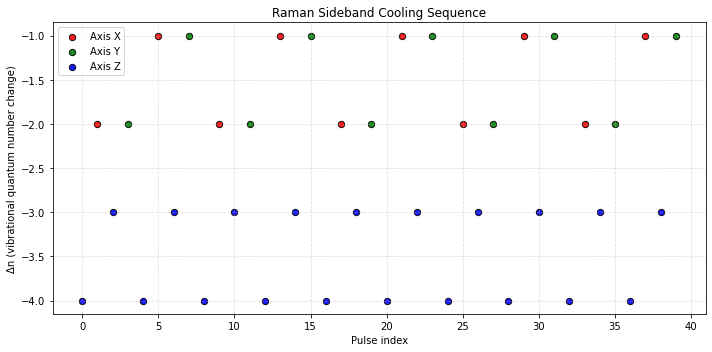

In [8]:
original_gpu = cr.get_original_sequences_gpu()  # list/tuple of cp.ndarray blocks

# Repeat each block along the first axis, then concatenate in order
blocks = [
    cp.tile(original_gpu[2], (5, 1)),  # repeat 5 times
]

seq_gpu = cp.concatenate(blocks, axis=0)
cr.visualize_sequence(seq_gpu)

In [3]:
np.save("XYZ2_original.npy", cp.asarray(seq_gpu))

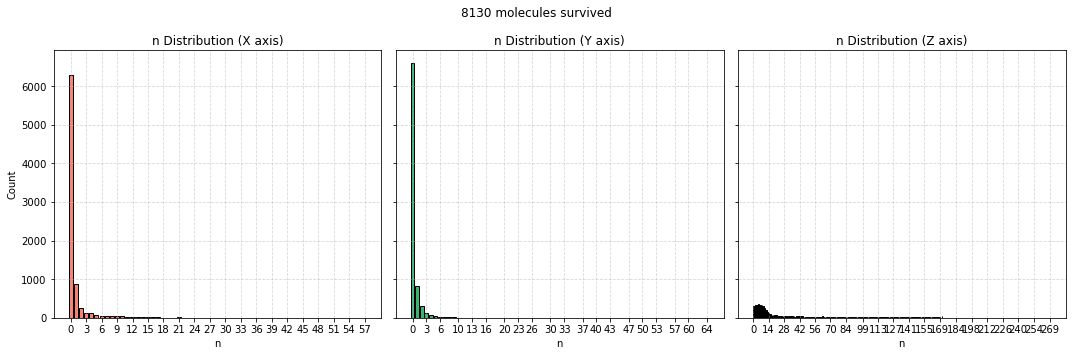

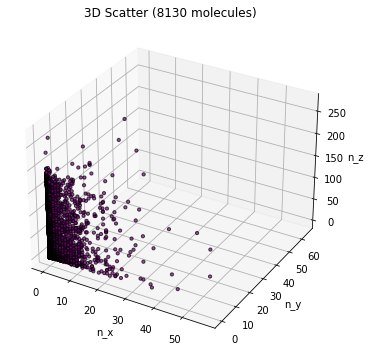

Raman pulses: 100%|██████████| 40/40 [00:07<00:00,  5.46it/s]


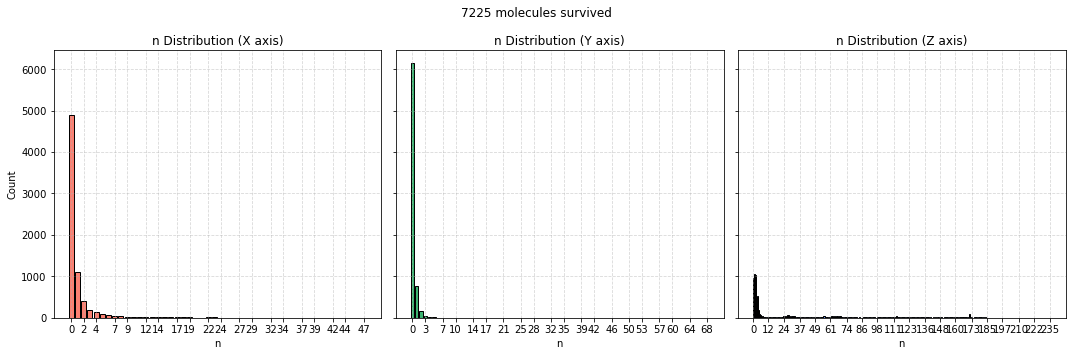

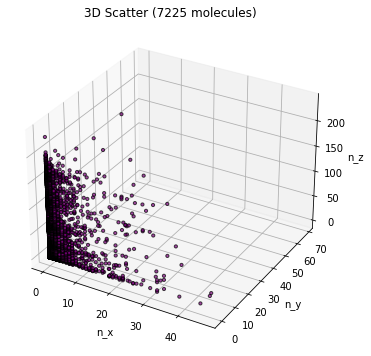

survival_rate_mean 0.7225
mot_mean [ 1.17453287  0.35972318 38.59294118]
mot_sem [0.00128358 0.00086832 0.02056663]


In [12]:
mol_0 = cp.asarray(np.load("mol_post_XYZ1.npy"))
dist_gpu = cr.get_n_distribution_gpu(mol_0, max_bins=20)
cr.raman_cool_with_pumping(mol_0, seq_gpu, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_0, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_0)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])

In [13]:
score_sequence(mol_0)

2856

#### Optimized

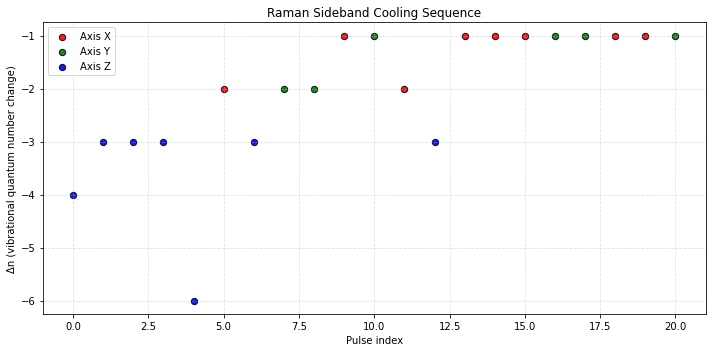

In [2]:
seq_op = cp.array(np.load("ga_runs/XYZ1_20251030_054734/final_top5/top1_sequence.npy"))
cr.visualize_sequence(seq_op)

Raman pulses: 100%|██████████| 21/21 [00:03<00:00,  5.25it/s]


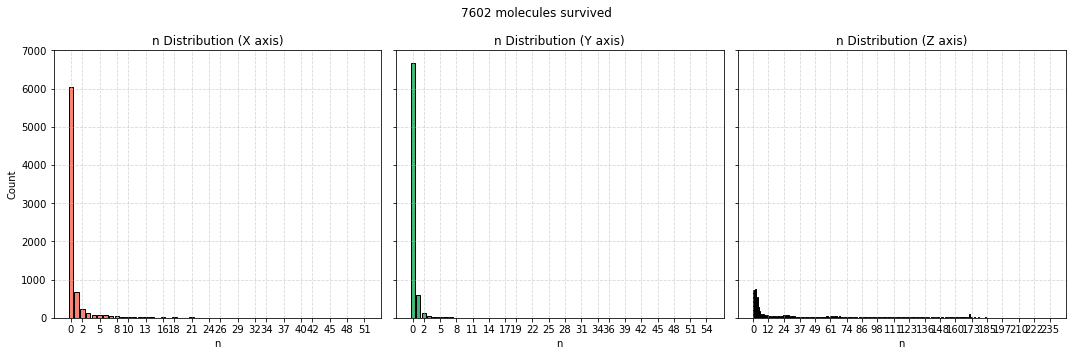

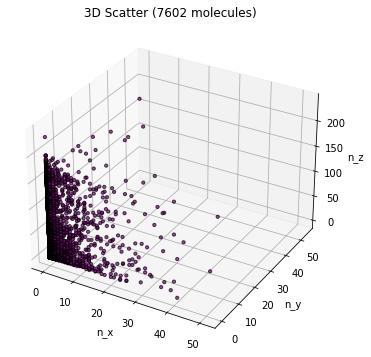

survival_rate_mean 0.7602
mot_mean [ 0.9558011   0.39344909 40.06919232]
mot_sem [0.00129823 0.00082868 0.01873564]


In [14]:
mol_1 = cp.asarray(np.load("mol_post_XYZ1.npy"))
cr.raman_cool_with_pumping(mol_1, seq_op, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_1, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_1)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])

In [15]:
score_sequence(mol_1)

2666

In [20]:
history_max = np.load("ga_runs/XYZ1_20251030_054734/history_best.npy")
print(history_max)

[1065. 1089. 1104. 1154. 1149. 1191. 1186. 1210. 1204. 1250. 1259. 1269.
 1305. 1338. 1368. 1372. 1376. 1411. 1459. 1445. 1455. 1440. 1508. 1518.
 1518. 1518. 1552. 1582. 1582. 1597. 1632. 1599. 1640. 1623. 1651. 1707.
 1678. 1702. 1705. 1683.]


In [19]:
history_max = np.load("../XYZ1/ga_runs/XYZ1_20251029_213358/history_best.npy")
print(history_max)

[ 618.  643.  663.  697.  745.  793.  842.  842.  950.  945.  929. 1008.
  998. 1048. 1074. 1077. 1077. 1080. 1149. 1109. 1145. 1162. 1201. 1210.
 1210. 1245. 1245. 1208. 1227. 1238. 1261. 1381. 1258. 1263. 1280. 1297.
 1324. 1342. 1318. 1316.]


In [6]:
cr.save_molecules(mol_1, "post_XYZ1.npy")

[✓] Molecules saved to: C:\Users\LyuQi\Documents\optimize_sequence\XYZ1\post_XYZ1.npy  (shape=(10000, 6))
